In [2]:
import pickle

# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/Users/ypi/Desktop/未命名文件夹/bike_data.csv',encoding='gbk')

In [4]:
df.head()

,OrderNumber,LineNumber,Model
0,cumid51178,1,山地英骑
1,cumid51178,2,山地车水壶架
2,cumid51178,3,运动水壶
3,cumid51184,1,山地英骑
4,cumid51184,2,hl山地外胎


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52761 entries, 0 to 52760
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderNumber  52761 non-null  object
 1   LineNumber   52761 non-null  int64 
 2   Model        52761 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

OrderNumber    0
LineNumber     0
Model          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.OrderNumber.value_counts()

cumid58845    8
cumid72656    8
cumid70714    8
cumid71961    7
cumid58572    7
             ..
cumid57968    1
cumid69313    1
cumid72237    1
cumid58893    1
cumid63689    1
Name: OrderNumber, Length: 21255, dtype: int64

In [9]:
df.Model.nunique()

37

In [10]:
models=df.Model.value_counts().reset_index(name='count')

In [11]:
top15=models.head(15)

In [12]:
df[df['LineNumber']==1].Model.value_counts()


山地英骑                       2477
山地车内胎                      1481
竞速公路车                      1419
旅游型自行车(小)                  1221
运动水壶                       1080
公路车内胎                      1071
公路车550                     1033
公路车350                      923
山地车挡泥板                      820
旅游车内胎                       751
Women's Mountain Shorts     723
ml山地外胎                      709
普通公路车                       706
山地车水壶架                      595
hl山地外胎                      583
山地车400                      543
ll山地胎                       538
旅游型自行车(大)                   527
ll公路车外胎                     480
山地车500                      473
旅游自行车外胎(通用)                 468
ml公路外胎                      396
hl公路外胎                      389
自行车帽                        379
旅游型自行车(中)                   357
运动型头盔                       219
长袖骑车衣                       195
短袖经典车衣                      181
修补工具                        153
洗车喷剂                         81
半掌手套                         71
公路车水壶架  

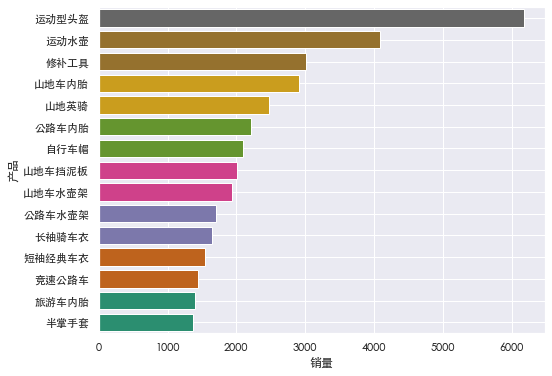

In [13]:
import seaborn as sns 
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'/System/Library/Fonts/STHeiti Light.ttc')
sns.set(font=myfont.get_name())


plt.figure(figsize=(8, 6))
sns.barplot(data=top15, x='count', y='index',palette='Dark2_r')

plt.xlabel('销量')
plt.ylabel('产品')
plt.grid(True)

In [14]:
df[df['Model']=='运动型头盔'].LineNumber.value_counts()

2    2952
3    1798
4    1084
1     219
5     100
6      14
7       4
Name: LineNumber, dtype: int64

In [48]:
## 计算产品关联程度

from apyori import apriori 

In [58]:
basket=df.groupby('OrderNumber')['Model'].aggregate(lambda x: list(x)).reset_index(name='basket')

## basket = df.groupby()[].aggregate(lambda x: list(x)).resrt_index(name='')

In [95]:
from apyori import apriori
rules = apriori(basket['basket'], min_support = 0.004, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [96]:
results = list(rules)


RelationRecord(items=frozenset({"Women's Mountain Shorts", '山地车400'}), support=0.007998118089861209, ordered_statistics=[OrderedStatistic(items_base=frozenset({'山地车400'}), items_add=frozenset({"Women's Mountain Shorts"}), confidence=0.31307550644567217, lift=6.946158548541505)])

In [97]:
def inspect(results):
    lhs     =  [tuple(result [2] [0] [0]) [0] for result in results]
    rhs     =  [tuple(result [2] [0] [1]) [0] for result in results]
    supports = [result [1] for result in results]
    confidences = [result [2] [0] [2]   for result in results]
    lifts = [result [2] [0] [3]   for result in results]
    return list(zip(lhs,rhs,supports,confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results),columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'] )
resultsinDataFrame.head(3)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,山地车400,Women's Mountain Shorts,0.007998,0.313076,6.946159
1,hl公路外胎,公路车内胎,0.025970,0.686567,6.585282
2,hl公路外胎,普通公路车,0.009833,0.259950,7.826123


In [98]:
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
28,hl山地外胎,山地英骑,0.015573,0.248685,15.969196
44,旅游自行车外胎(通用),修补工具,0.009551,0.230420,13.529217
70,旅游自行车外胎(通用),旅游车内胎,0.006446,0.861635,13.109561
22,旅游自行车外胎(通用),旅游车内胎,0.035662,0.860386,13.090553
71,旅游自行车外胎(通用),旅游车内胎,0.011103,0.267877,12.596758
53,公路车水壶架,运动水壶,0.022818,0.284959,12.488249
74,山地车挡泥板,山地英骑,0.005410,0.309973,11.185869
35,运动型头盔,公路车内胎,0.008751,1.000000,9.591606
24,普通公路车,hl公路外胎,0.007104,0.213881,8.235582
2,hl公路外胎,普通公路车,0.009833,0.259950,7.826123


In [99]:
hubu = resultsinDataFrame[resultsinDataFrame['Lift'] > 1].sort_values(by='Lift', ascending=False).head(20)

In [100]:
hubu

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
28,hl山地外胎,山地英骑,0.015573,0.248685,15.969196
44,旅游自行车外胎(通用),修补工具,0.009551,0.230420,13.529217
70,旅游自行车外胎(通用),旅游车内胎,0.006446,0.861635,13.109561
22,旅游自行车外胎(通用),旅游车内胎,0.035662,0.860386,13.090553
71,旅游自行车外胎(通用),旅游车内胎,0.011103,0.267877,12.596758
53,公路车水壶架,运动水壶,0.022818,0.284959,12.488249
74,山地车挡泥板,山地英骑,0.005410,0.309973,11.185869
35,运动型头盔,公路车内胎,0.008751,1.000000,9.591606
24,普通公路车,hl公路外胎,0.007104,0.213881,8.235582
2,hl公路外胎,普通公路车,0.009833,0.259950,7.826123


In [105]:
purchase_good = resultsinDataFrame[resultsinDataFrame['Left Hand Side'] == '山地英骑']


In [106]:
purchase_good

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
18,山地英骑,山地车挡泥板,0.034345,0.294711,3.110273
19,山地英骑,山地车水壶架,0.034110,0.292693,3.205144
60,山地英骑,山地车水壶架,0.010351,0.309859,3.393125
61,山地英骑,运动水壶,0.027711,0.237788,3.114095
76,山地英骑,运动水壶,0.008280,0.242759,4.886207


In [119]:
purchase_good.sort_values(by='Confidence', ascending=False)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
60,山地英骑,山地车水壶架,0.010351,0.309859,3.393125
18,山地英骑,山地车挡泥板,0.034345,0.294711,3.110273
19,山地英骑,山地车水壶架,0.034110,0.292693,3.205144
76,山地英骑,运动水壶,0.008280,0.242759,4.886207
61,山地英骑,运动水壶,0.027711,0.237788,3.114095
